<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.8 MB/s eta 0:00:00


DiabetesRisk: 91.83333333333331


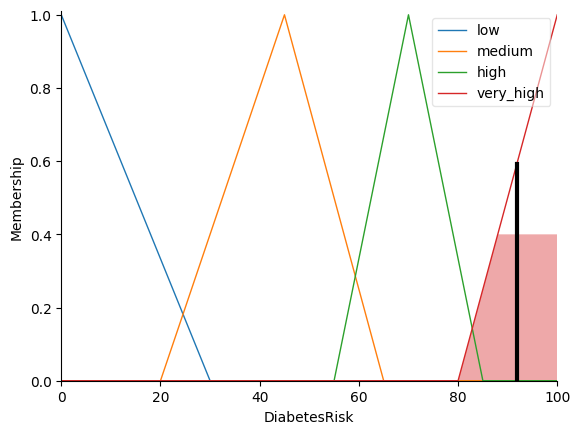

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


BloodSugar = ctrl.Antecedent(np.arange(50, 301, 1), 'BloodSugar')
BMI = ctrl.Antecedent(np.arange(10, 50, 0.1), 'BMI')
UrinationFreq = ctrl.Antecedent(np.arange(0, 11, 1), 'UrinationFreq')
Fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'Fatigue')

DiabetesRisk = ctrl.Consequent(np.arange(0, 101, 1), 'DiabetesRisk')

BloodSugar['low'] = fuzz.trimf(BloodSugar.universe, [50, 70, 90])
BloodSugar['normal'] = fuzz.trimf(BloodSugar.universe, [85, 100, 125])
BloodSugar['high'] = fuzz.trimf(BloodSugar.universe, [120, 160, 200])
BloodSugar['very_high'] = fuzz.trimf(BloodSugar.universe, [190, 250, 300])

BMI['underweight'] = fuzz.trimf(BMI.universe, [10, 15, 18.5])
BMI['normal'] = fuzz.trimf(BMI.universe, [18, 21.7, 24.9])
BMI['overweight'] = fuzz.trimf(BMI.universe, [24, 27, 30])
BMI['obese'] = fuzz.trimf(BMI.universe, [29, 35, 50])

UrinationFreq['rarely'] = fuzz.trimf(UrinationFreq.universe, [0, 0, 3])
UrinationFreq['sometimes'] = fuzz.trimf(UrinationFreq.universe, [2, 5, 7])
UrinationFreq['often'] = fuzz.trimf(UrinationFreq.universe, [6, 10, 10])

Fatigue['low'] = fuzz.trimf(Fatigue.universe, [0, 0, 3])
Fatigue['moderate'] = fuzz.trimf(Fatigue.universe, [2, 5, 7])
Fatigue['high'] = fuzz.trimf(Fatigue.universe, [6, 10, 10])

DiabetesRisk['low'] = fuzz.trimf(DiabetesRisk.universe, [0, 0, 30])
DiabetesRisk['medium'] = fuzz.trimf(DiabetesRisk.universe, [20, 45, 65])
DiabetesRisk['high'] = fuzz.trimf(DiabetesRisk.universe, [55, 70, 85])
DiabetesRisk['very_high'] = fuzz.trimf(DiabetesRisk.universe, [80, 100, 100])

rules = [
    ctrl.Rule(BloodSugar['very_high'] & UrinationFreq['often'], DiabetesRisk['very_high']),
    ctrl.Rule(BloodSugar['very_high'] & UrinationFreq['sometimes'], DiabetesRisk['high']),
    ctrl.Rule(BloodSugar['high'] & UrinationFreq['often'], DiabetesRisk['high']),
    ctrl.Rule(BloodSugar['normal'] & UrinationFreq['rarely'], DiabetesRisk['low']),
    ctrl.Rule(BloodSugar['very_high'] & BMI['obese'], DiabetesRisk['very_high']),
    ctrl.Rule(BloodSugar['very_high'] & BMI['overweight'], DiabetesRisk['high']),
    ctrl.Rule(BloodSugar['high'] & BMI['overweight'], DiabetesRisk['high']),
    ctrl.Rule(BloodSugar['high'] & BMI['normal'], DiabetesRisk['medium']),
    ctrl.Rule(BloodSugar['normal'] & BMI['normal'], DiabetesRisk['low']),
    ctrl.Rule(BloodSugar['very_high'] & Fatigue['high'], DiabetesRisk['very_high']),
    ctrl.Rule(BloodSugar['high'] & Fatigue['high'], DiabetesRisk['high']),
    ctrl.Rule(BloodSugar['high'] & Fatigue['moderate'], DiabetesRisk['medium']),
    ctrl.Rule(BloodSugar['normal'] & Fatigue['low'], DiabetesRisk['low']),
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['BloodSugar'] = 280
fuzzy_system.input['UrinationFreq'] = 38
fuzzy_system.input['BMI'] = 9
fuzzy_system.input['Fatigue'] = 9

fuzzy_system.compute()

print('DiabetesRisk:',fuzzy_system.output['DiabetesRisk'])
DiabetesRisk.view(sim=fuzzy_system)

DiabetesRisk: 53.51872074882994


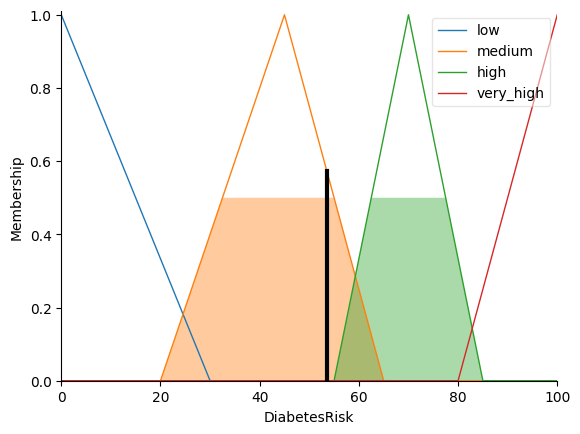

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


BloodSugar = ctrl.Antecedent(np.arange(50, 301, 1), 'BloodSugar')
BMI = ctrl.Antecedent(np.arange(10, 50, 0.1), 'BMI')
UrinationFreq = ctrl.Antecedent(np.arange(0, 11, 1), 'UrinationFreq')
Fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'Fatigue')

DiabetesRisk = ctrl.Consequent(np.arange(0, 101, 1), 'DiabetesRisk')

BloodSugar['low'] = fuzz.trimf(BloodSugar.universe, [50, 70, 90])
BloodSugar['normal'] = fuzz.trimf(BloodSugar.universe, [85, 100, 125])
BloodSugar['high'] = fuzz.trimf(BloodSugar.universe, [120, 160, 200])
BloodSugar['very_high'] = fuzz.trimf(BloodSugar.universe, [190, 250, 300])

BMI['underweight'] = fuzz.trimf(BMI.universe, [10, 15, 18.5])
BMI['normal'] = fuzz.trimf(BMI.universe, [18, 21.7, 24.9])
BMI['overweight'] = fuzz.trimf(BMI.universe, [24, 27, 30])
BMI['obese'] = fuzz.trimf(BMI.universe, [29, 35, 50])

UrinationFreq['rarely'] = fuzz.trimf(UrinationFreq.universe, [0, 0, 3])
UrinationFreq['sometimes'] = fuzz.trimf(UrinationFreq.universe, [2, 5, 7])
UrinationFreq['often'] = fuzz.trimf(UrinationFreq.universe, [6, 10, 10])

Fatigue['low'] = fuzz.trimf(Fatigue.universe, [0, 0, 3])
Fatigue['moderate'] = fuzz.trimf(Fatigue.universe, [2, 5, 7])
Fatigue['high'] = fuzz.trimf(Fatigue.universe, [6, 10, 10])

DiabetesRisk['low'] = fuzz.trimf(DiabetesRisk.universe, [0, 0, 30])
DiabetesRisk['medium'] = fuzz.trimf(DiabetesRisk.universe, [20, 45, 65])
DiabetesRisk['high'] = fuzz.trimf(DiabetesRisk.universe, [55, 70, 85])
DiabetesRisk['very_high'] = fuzz.trimf(DiabetesRisk.universe, [80, 100, 100])

rules = [
    ctrl.Rule(BloodSugar['very_high'] & UrinationFreq['often'], DiabetesRisk['very_high']),
    ctrl.Rule(BloodSugar['very_high'] & UrinationFreq['sometimes'], DiabetesRisk['high']),
    ctrl.Rule(BloodSugar['high'] & UrinationFreq['often'], DiabetesRisk['high']),
    ctrl.Rule(BloodSugar['normal'] & UrinationFreq['rarely'], DiabetesRisk['low']),
    ctrl.Rule(BloodSugar['very_high'] & BMI['obese'], DiabetesRisk['very_high']),
    ctrl.Rule(BloodSugar['very_high'] & BMI['overweight'], DiabetesRisk['high']),
    ctrl.Rule(BloodSugar['high'] & BMI['overweight'], DiabetesRisk['high']),
    ctrl.Rule(BloodSugar['high'] & BMI['normal'], DiabetesRisk['medium']),
    ctrl.Rule(BloodSugar['normal'] & BMI['normal'], DiabetesRisk['low']),
    ctrl.Rule(BloodSugar['very_high'] & Fatigue['high'], DiabetesRisk['very_high']),
    ctrl.Rule(BloodSugar['high'] & Fatigue['high'], DiabetesRisk['high']),
    ctrl.Rule(BloodSugar['high'] & Fatigue['moderate'], DiabetesRisk['medium']),
    ctrl.Rule(BloodSugar['normal'] & Fatigue['low'], DiabetesRisk['low']),
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['BloodSugar'] = 180
fuzzy_system.input['UrinationFreq'] = 24
fuzzy_system.input['BMI'] = 5
fuzzy_system.input['Fatigue'] = 5

fuzzy_system.compute()

print('DiabetesRisk:',fuzzy_system.output['DiabetesRisk'])
DiabetesRisk.view(sim=fuzzy_system)